# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nemuro
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | delta
Processing Record 5 of Set 1 | sisimiut
Processing Record 6 of Set 1 | pithora
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | colchani
Processing Record 9 of Set 1 | westport
Processing Record 10 of Set 1 | manggar
Processing Record 11 of Set 1 | lihue
Processing Record 12 of Set 1 | isafjordur
Processing Record 13 of Set 1 | shevchenko
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | norilsk
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | al-`ula
City not found. Skipping...
Processing Record 20 of Set 1 | langsa
Processing Record 21 of Set 1 | wailua homesteads
Processing Record 2

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nemuro,43.3236,145.5750,289.48,100,91,2.00,JP,1690304789
1,adamstown,-25.0660,-130.1015,295.49,89,93,15.21,PN,1690304536
2,waitangi,-43.9535,-176.5597,282.49,98,100,2.24,NZ,1690304789
3,delta,5.5000,6.0000,301.73,70,100,2.57,NG,1690304794
4,sisimiut,66.9395,-53.6735,280.49,80,52,6.29,GL,1690304794


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nemuro,43.3236,145.5750,289.48,100,91,2.00,JP,1690304789
1,adamstown,-25.0660,-130.1015,295.49,89,93,15.21,PN,1690304536
2,waitangi,-43.9535,-176.5597,282.49,98,100,2.24,NZ,1690304789
3,delta,5.5000,6.0000,301.73,70,100,2.57,NG,1690304794
4,sisimiut,66.9395,-53.6735,280.49,80,52,6.29,GL,1690304794


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

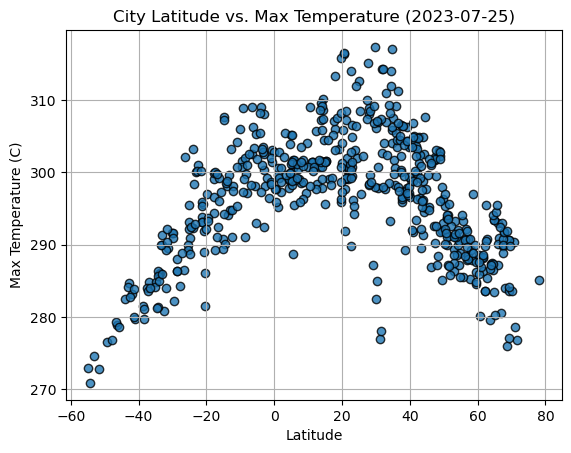

In [19]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)

# # Convert timestamp to date
# date_time = datetime.fromtimestamp(city_data_df["Date"])
# date = date_time.strftime("%Y%m%d")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()
# NOTE: need to find a way to add current date to title
plt.title(f"City Latitude vs. Max Temperature (2023-07-25)")


# NOTE: need to un REM Save the figure
# plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

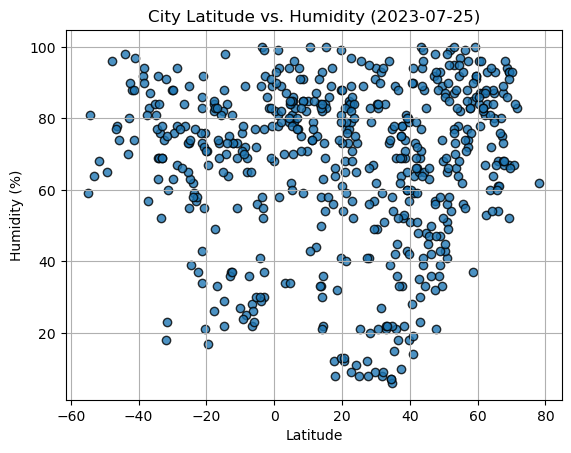

In [21]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
# NOTE: need to find a way to add current date to title
plt.title(f"City Latitude vs. Humidity (2023-07-25)")

# NOTE: need to un REM Save the figure
# plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

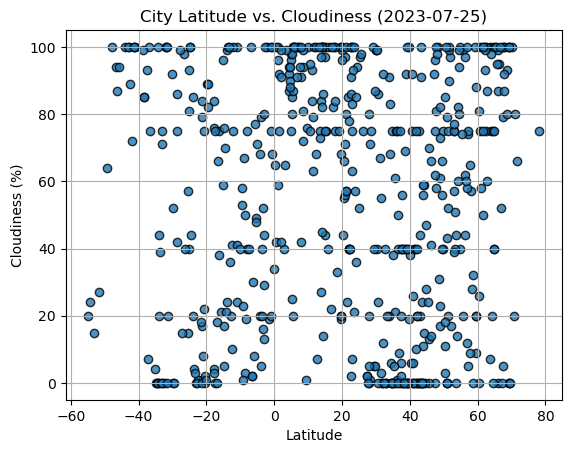

In [22]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
# NOTE: need to find a way to add current date to title
plt.title(f"City Latitude vs. Cloudiness (2023-07-25)")

# Save the figure
# plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

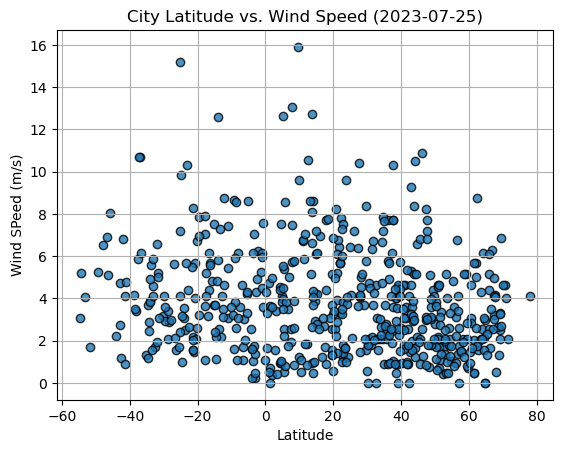

In [23]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind SPeed (m/s)')
plt.grid()
# NOTE: need to find a way to add current date to title
plt.title(f"City Latitude vs. Wind Speed (2023-07-25)")

# NOTE: Need to unREM Save the figure
# plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [49]:
# Define a function to create Linear Regression plots
def plot_linregress(df, x_val, y_val):
    x = df[x_val]
    y = df[y_val]

    # Perform a linear regression
    (slope, y_int, r_value, p_value, std_err) = linregress(x, y)
    line_eq = f"y = {round(slope,2)} x + {round(y_int,2)}"
    reg_values = x * slope + y_int
    
    # plot scatter
    plt.scatter(x, y)
    # plot linear regression line
    plt.plot(x, reg_values, "r-")

    # Label plot and annotate the line equation
    plt.xlabel("Latitude")
    plt.ylabel("Temperature")
    plt.annotate(line_eq, ((x.min()+10), (y.min()+5)), fontsize=15, color="red")

    # Print r value
    print(f"The r-value is: {r_value**2}")

    # Show plot
    plt.show()


In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nemuro,43.3236,145.5750,289.48,100,91,2.00,JP,1690304789
3,delta,5.5000,6.0000,301.73,70,100,2.57,NG,1690304794
4,sisimiut,66.9395,-53.6735,280.49,80,52,6.29,GL,1690304794
5,pithora,21.2667,82.5167,300.44,77,80,3.92,IN,1690304794
8,westport,41.1415,-73.3579,305.05,64,0,4.63,US,1690304795


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,295.49,89,93,15.21,PN,1690304536
2,waitangi,-43.9535,-176.5597,282.49,98,100,2.24,NZ,1690304789
6,port-aux-francais,-49.3500,70.2167,276.49,65,64,5.26,TF,1690304794
7,colchani,-20.3000,-66.9333,281.56,21,0,6.70,BO,1690304795
9,manggar,-2.8833,108.2667,300.37,77,13,4.31,ID,1690304795


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.3698991049359426


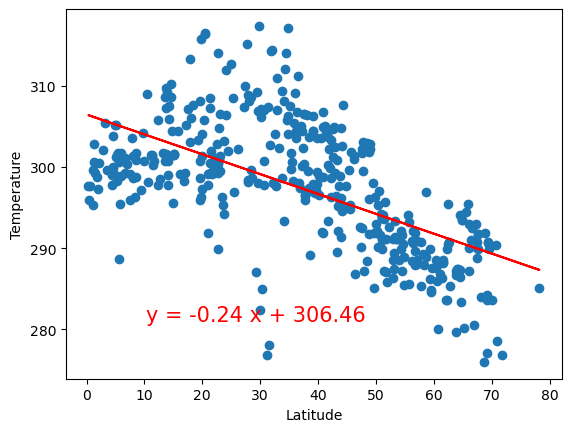

In [50]:
# Linear regression on Northern Hemisphere
plot_linregress(northern_hemi_df, "Lat", "Max Temp")

The r-value is: 0.7505405090498959


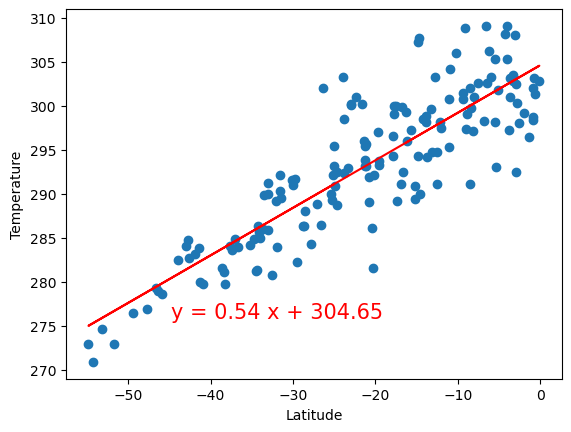

In [51]:
# Linear regression on Southern Hemisphere
plot_linregress(southern_hemi_df, "Lat", "Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.004843272808244058


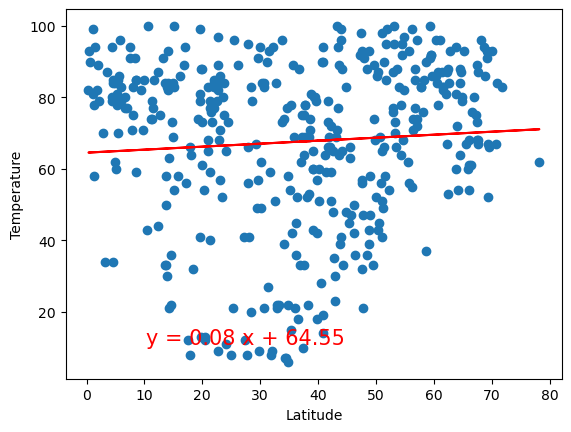

In [52]:
# Northern Hemisphere
plot_linregress(northern_hemi_df, "Lat", "Humidity")

The r-value is: 0.07042978893787841


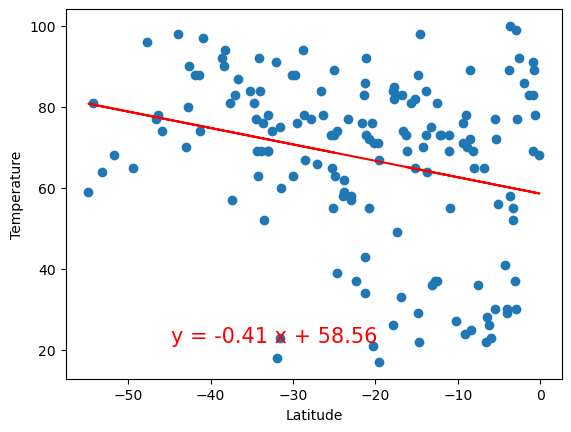

In [53]:
# Southern Hemisphere
plot_linregress(southern_hemi_df, "Lat", "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03100993692773174


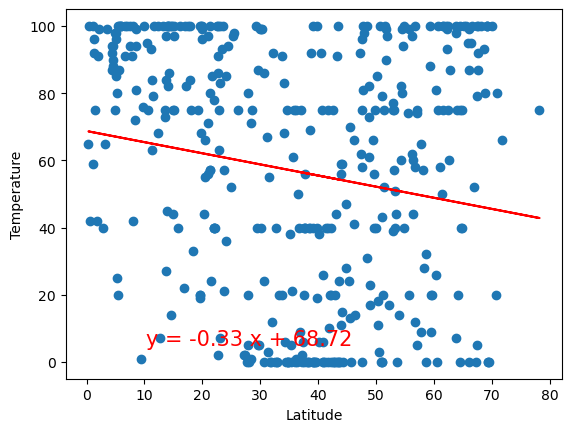

In [54]:
# Northern Hemisphere
plot_linregress(northern_hemi_df, "Lat", "Cloudiness")

The r-value is: 0.015514237765583699


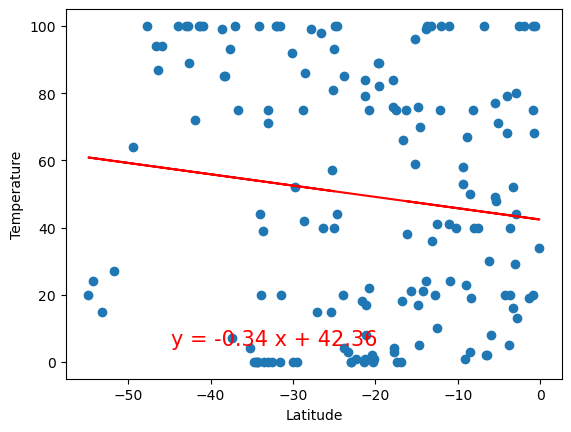

In [55]:
# Southern Hemisphere
plot_linregress(southern_hemi_df, "Lat", "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.034633533006772355


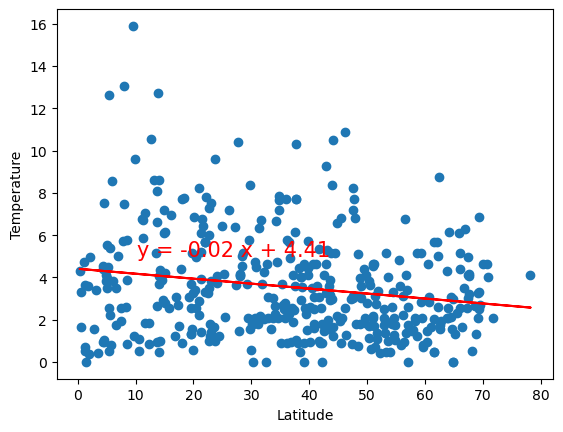

In [56]:
# Northern Hemisphere
plot_linregress(northern_hemi_df, "Lat", "Wind Speed")

The r-value is: 0.002473698526940159


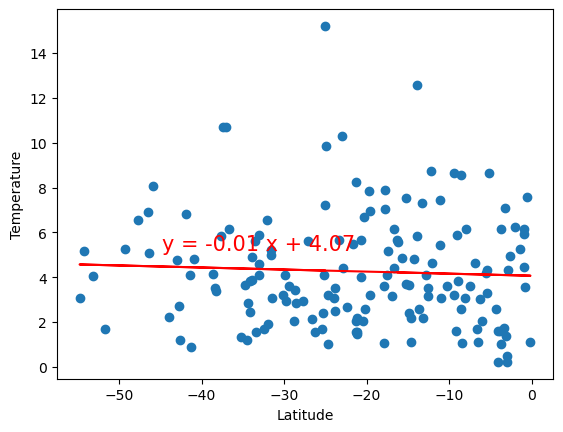

In [57]:
# Southern Hemisphere
plot_linregress(southern_hemi_df, "Lat", "Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE